# Natural Language Processing

## Spam Filter

#### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import warnings
warnings.filterwarnings('ignore')
# Remove Punctuations
import string
# Stopwords
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
# Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
# Model-Evaluation
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#nltk.download_shell()

In [3]:
texts = [line.rstrip() for line in open('SMSSpamCollection')]

In [4]:
for number,texts in enumerate(texts[:5]):
    print(number, texts)
    print("\n")

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though




In [5]:
df = pd.read_csv('SMSSpamCollection', sep = "\t", names = ['label', 'text'])

In [6]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<AxesSubplot:xlabel='label', ylabel='count'>

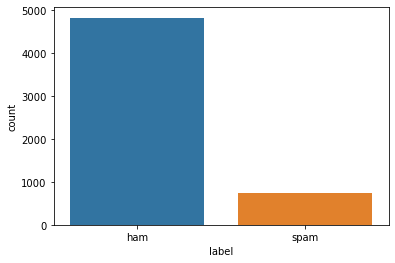

In [7]:
sns.countplot(df['label'])

In [8]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
df.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [10]:
df['length'] = df['text'].apply(len)

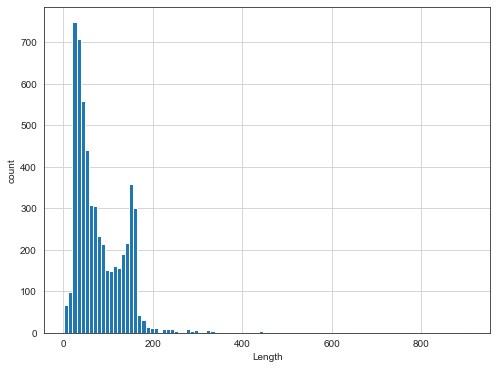

In [11]:
sns.set_style('white')
plt.figure(figsize=(8,6))
df['length'].hist(bins = 100)
plt.ylabel('count')
plt.xlabel('Length')
plt.show()

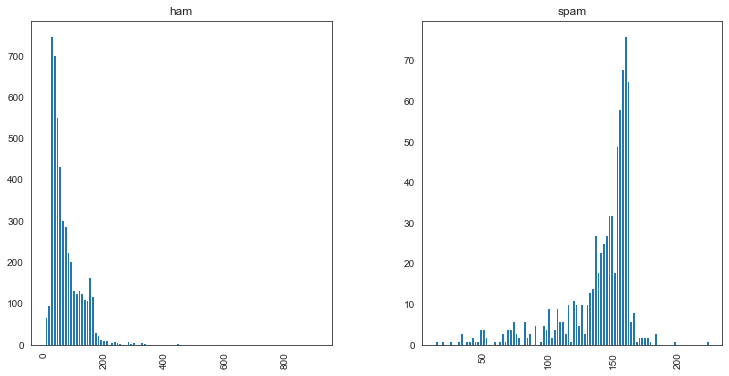

In [12]:
sns.set_style('white')
df.hist(bins = 100, by = 'label', column = 'length', figsize=(12,6))
plt.show()

In [13]:
ham = df[df['label'] == 'ham'].sample(747).drop('length', axis = 1)
spam = df[df['label'] == 'spam'].sample(747).drop('length', axis = 1)
df = pd.concat([ham, spam], axis = 0)

# Remove Punctuations

In [14]:
# Remove Punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
texts = df['text'][34]

## texts

In [16]:
nopunc = [c for c in texts if c not in string.punctuation] 

In [17]:
nopunc = "".join(nopunc)

In [18]:
nopunc

'Thanks for your subscription to Ringtone UK your mobile will be charged £5month Please confirm by replying YES or NO If you reply NO you will not be charged'

In [19]:
nopunc.split()

['Thanks',
 'for',
 'your',
 'subscription',
 'to',
 'Ringtone',
 'UK',
 'your',
 'mobile',
 'will',
 'be',
 'charged',
 '£5month',
 'Please',
 'confirm',
 'by',
 'replying',
 'YES',
 'or',
 'NO',
 'If',
 'you',
 'reply',
 'NO',
 'you',
 'will',
 'not',
 'be',
 'charged']

In [20]:
# Stopwords
from nltk.corpus import stopwords

clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [21]:
clean_text = "".join(clean)

# Tokenization

In [22]:
df['text']

3177    Havent still waitin as usual... Ü come back sc...
550     Ok give me 5 minutes I think I see her. BTW yo...
4977    You are gorgeous! keep those pix cumming :) th...
3199       7 lor... Change 2 suntec... Wat time u coming?
447     Well done, blimey, exercise, yeah, i kinda rem...
                              ...                        
309     TheMob> Check out our newest selection of cont...
635     Dear Voucher Holder, 2 claim this weeks offer,...
1129    Ur HMV Quiz cash-balance is currently £500 - t...
2965    Do you ever notice that when you're driving, a...
5466    http//tms. widelive.com/index. wml?id=820554ad...
Name: text, Length: 1494, dtype: object

In [23]:
# Function
def tokenizer_func(texts):
    """
    1. Remove Punctuations
    2. Remove Stop words
    3. Return List of clean text words
    """
    nopunc = [c for c in texts if c not in string.punctuation] 
    nopunc = "".join(nopunc)
    
    return [word for word in nopunc.split() if nopunc.lower() not in stopwords.words('english')]

In [24]:
print(df['text'].head().apply(tokenizer_func))

3177    [Havent, still, waitin, as, usual, Ü, come, ba...
550     [Ok, give, me, 5, minutes, I, think, I, see, h...
4977    [You, are, gorgeous, keep, those, pix, cumming...
3199    [7, lor, Change, 2, suntec, Wat, time, u, coming]
447     [Well, done, blimey, exercise, yeah, i, kinda,...
Name: text, dtype: object


# Vectorization

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
bow_transformer = CountVectorizer(tokenizer=tokenizer_func).fit(df['text'])

In [27]:
print(len(bow_transformer.vocabulary_))

4920


In [28]:
text_4 = bow_transformer.transform([df['text'].iloc[34]])

In [29]:
print(text_4)

  (0, 897)	1
  (0, 954)	1
  (0, 2170)	1
  (0, 2318)	1
  (0, 2357)	1
  (0, 4829)	1


In [30]:
text_4.shape

(1, 4920)

In [31]:
bow_transformer.get_feature_names()[4080]

'subtoitles'

In [32]:
df['text'].iloc[4]

'Well done, blimey, exercise, yeah, i kinda remember wot that is, hmm. '

In [33]:
text_bow = bow_transformer.transform(df['text'])

In [34]:
text_bow.shape

(1494, 4920)

In [35]:
text_bow.nnz ## Non-zeroes

26201

In [36]:
sparsity = (100*text_bow.nnz/(text_bow.shape[0]*text_bow.shape[1]))

In [37]:
sparsity

0.3564529119186774

# TF-IDF

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer

In [39]:
tfidf_transformer = TfidfTransformer().fit(text_bow)

In [40]:
tfidf4 = tfidf_transformer.transform(text_4)

In [41]:
print(tfidf4)

  (0, 4829)	0.24318092881582848
  (0, 2357)	0.28420128070717743
  (0, 2318)	0.45442897408786154
  (0, 2170)	0.5270479572271677
  (0, 954)	0.36715696213136634
  (0, 897)	0.49092075873328167


In [42]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['kiss']]

6.230439944144951

In [43]:
text_tfidf = tfidf_transformer.transform(text_bow)

In [44]:
print(text_tfidf.shape)

(1494, 4920)


# Naive Bayes Classifier

In [45]:
from sklearn.naive_bayes import MultinomialNB

In [46]:
df.head()

,label,text
3177,ham,Havent still waitin as usual... Ü come back sc...
550,ham,Ok give me 5 minutes I think I see her. BTW yo...
4977,ham,You are gorgeous! keep those pix cumming :) th...
3199,ham,7 lor... Change 2 suntec... Wat time u coming?
447,ham,"Well done, blimey, exercise, yeah, i kinda rem..."


In [47]:
labels = pd.get_dummies(df['label'], drop_first= True)
labels.head()

,spam
3177,0
550,0
4977,0
3199,0
447,0


In [48]:
X_train, X_test, y_train, y_test = train_test_split(text_tfidf, labels, test_size=0.2, random_state=1)

In [49]:
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [50]:
pred = spam_detect_model.predict(X_test)

In [51]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[145   3]
 [  7 144]]


              precision    recall  f1-score   support

           0       0.95      0.98      0.97       148
           1       0.98      0.95      0.97       151

    accuracy                           0.97       299
   macro avg       0.97      0.97      0.97       299
weighted avg       0.97      0.97      0.97       299

